In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
%config InlineBackend.figure_format='retina'

Define the equations of the form ${ \dot{y}_1 \choose \dot{y}_2 } = f(y_1,y_2)$

Note, that for the differential equation solver (`odeint`) you can also have explicit dependence of the function $f$ on the free variable $t$, but then it is not correct to use the phase portrait.

In [6]:
def f(Y, t):
    y1, y2 = Y
    return [y2, y1*(y1*y1-1)]

(-2, 2)

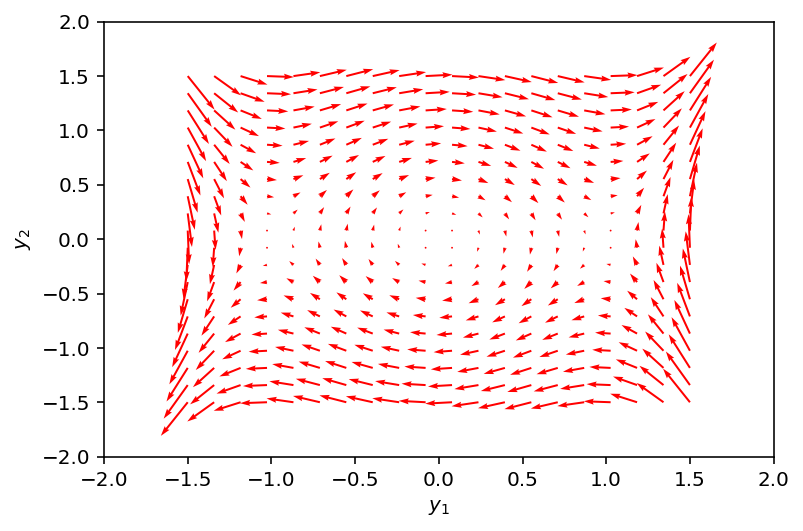

In [7]:
y1 = np.linspace(-1.5, 1.5, 20)
y2 = np.linspace(-1.5, 1.5, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

fig, ax = plt.subplots()

ax.quiver(Y1, Y2, u, v, color='r')

ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

/usr/lib64/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


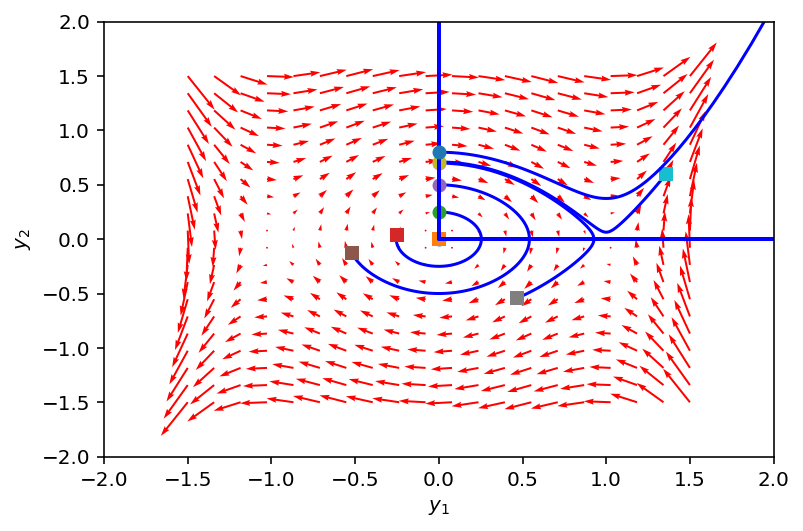

In [17]:
from scipy.integrate import odeint

fig, ax = plt.subplots()

ax.quiver(Y1, Y2, u, v, color='r')

ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

for y20 in [0, 0.25, 0.5, 0.7, 0.71, 0.8]:
    tspan = np.linspace(0, 5.0, 100)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    ax.plot(ys[:,0], ys[:,1], 'b-') # path
    ax.plot([ys[0,0]], [ys[0,1]], 'o') # start
    ax.plot([ys[-1,0]], [ys[-1,1]], 's') # end